### Load Data ###

In [36]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("data/titanic.tgz")
    if not tarball_path.is_file():
        Path("data").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("data/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [37]:
train_data, test_data = load_titanic_data()

### Data Structured

In [38]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [41]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Data Visualization

In [43]:
sex_acident = pd.DataFrame(train_data.groupby("Sex").agg("Survived").sum())
sex_acident


,Survived
Sex,
female,233
male,109


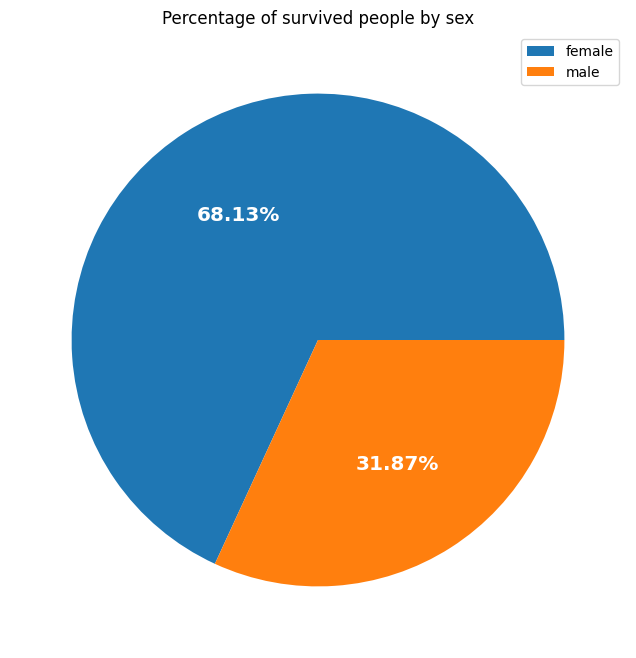

In [44]:

plt.figure(figsize=(10,8))
plt.pie(sex_acident["Survived"],
        labels= sex_acident.index,
        autopct= "%.2f%%",
        textprops= { 'size':"x-large", 
                    "fontweight":"bold",
                    "color":"w"})
plt.legend()
plt.title("Percentage of survived people by sex")
plt.show()

In [45]:
Pclass = pd.DataFrame(train_data["Pclass"].value_counts())
Pclass

,count
Pclass,
3,491
1,216
2,184


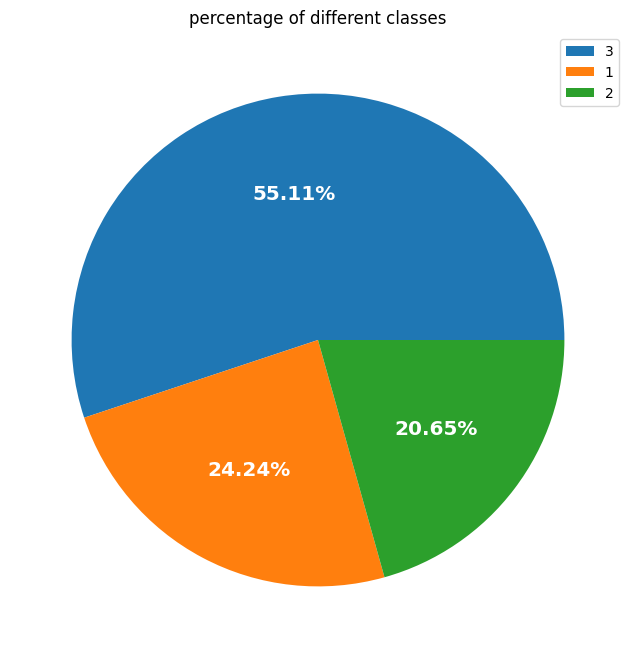

In [46]:
plt.figure(figsize=(10,8))
plt.pie(Pclass["count"],
        labels= Pclass.index,
        autopct= "%.2f%%",
        textprops= { 'size':"x-large", 
                    "fontweight":"bold",
                    "color":"w"})
plt.legend()
plt.title("percentage of different classes")
plt.show()

In [47]:
sex = pd.DataFrame(train_data["Sex"].value_counts())
sex


,count
Sex,
male,577
female,314


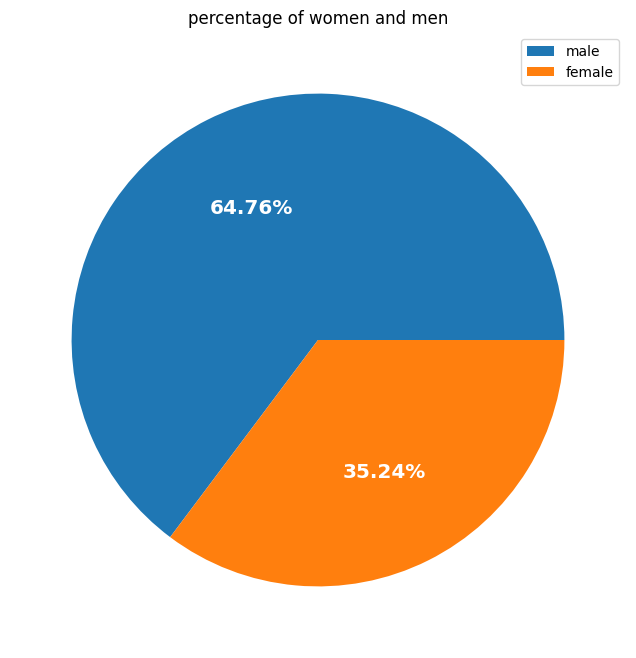

In [48]:
plt.figure(figsize=(10,8))
plt.pie(sex["count"],
        labels= sex.index,
        autopct= "%.2f%%",
        textprops= { 'size':"x-large", 
                    "fontweight":"bold",
                    "color":"w"})
plt.legend()
plt.title("percentage of women and men")
plt.show()

In [49]:
Embarked = pd.DataFrame(train_data["Embarked"].value_counts())
Embarked


,count
Embarked,
S,644
C,168
Q,77


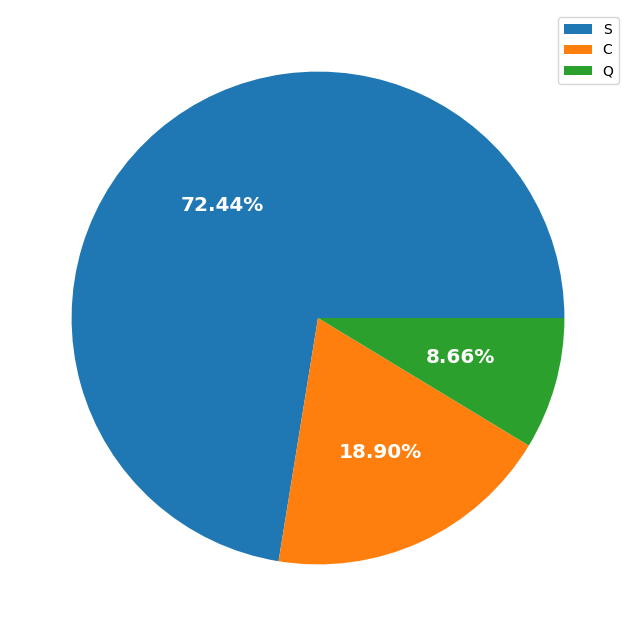

In [50]:
plt.figure(figsize=(10,8))
plt.pie(Embarked["count"],
        labels= Embarked.index,
        autopct= "%.2f%%",
        textprops= { 'size':"x-large", 
                    "fontweight":"bold",
                    "color":"w"})
plt.legend()
plt.show()

### Pipelines

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [52]:
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [54]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [55]:
y_train = train_data["Survived"]

## Model

### Regression

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = lin_reg.predict(X_train) 

In [58]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y_train, y_pred,
                              squared=False)
lin_rmse

/Users/joseguedes/Documents/programação/Python/ML/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.3773164934173675

### Desicion Tree

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = forest_clf.predict(X_train) 

In [61]:
tree_rmse = mean_squared_error(y_train, y_pred,
                              squared=False)
tree_rmse

/Users/joseguedes/Documents/programação/Python/ML/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.1421338109037403

In [62]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test) 

### SVE

In [63]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")

### Better evaluation

In [64]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train,cv=10)


In [65]:
pd.Series(forest_scores).describe()

count    10.000000
mean      0.813758
std       0.041337
min       0.755556
25%       0.780899
50%       0.820225
75%       0.839888
max       0.887640
dtype: float64

In [66]:
linear_score= cross_val_score(lin_reg, X_train, y_train, cv=10)

pd.Series(linear_score).describe()

count    10.000000
mean      0.362510
std       0.083923
min       0.181243
25%       0.338467
50%       0.377864
75%       0.394951
max       0.507278
dtype: float64

In [67]:
svm_scores = cross_val_score(svm_clf, X_train, y_train,  cv=10)

pd.Series(svm_scores).describe()

count    10.000000
mean      0.824931
std       0.032630
min       0.775281
25%       0.801092
50%       0.825843
75%       0.851124
max       0.876404
dtype: float64

## Final Model

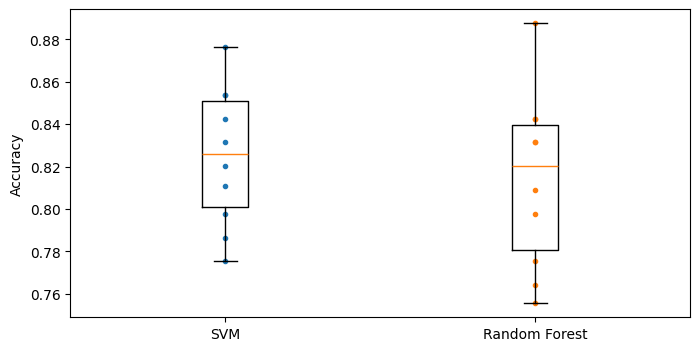

In [68]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

In [ ]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [ ]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(
    ['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
